# 0. FER-2013
* [FER-2013](https://www.kaggle.com/datasets/msambare/fer2013)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import os
train_dir = "/gdrive/My Drive/Colab Notebooks/data/fer2013/train"
test_dir = "/gdrive/My Drive/Colab Notebooks/data/fer2013/test"

## train 데이터 미리보기

In [5]:
image_label = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

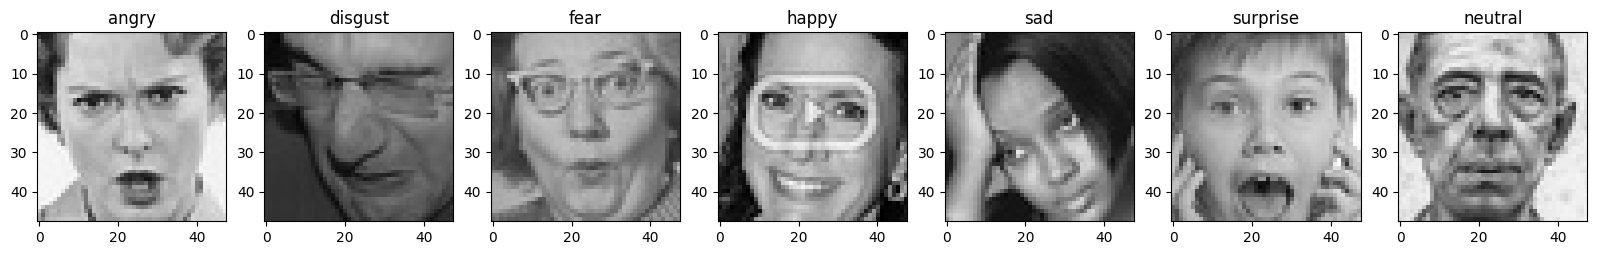

In [6]:
plt.figure(figsize=(20,5))

for i, img_label in enumerate(image_label):
    img = load_img((train_dir + '/' + img_label +'/'+ os.listdir(train_dir + '/' + img_label)[1]))
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    plt.title(img_label)
    plt.axis('on')

plt.show()

In [7]:
label_count = {}

for img_label in image_label:
    label_dir = train_dir + '/' + img_label
    label_count[img_label] = len(os.listdir(label_dir))

label_count = pd.DataFrame.from_dict(label_count, orient='index')
label_count.columns = ["count"]
label_count

,count
angry,4005
disgust,436
fear,4097
happy,7215
sad,4830
surprise,3171
neutral,4965


<Axes: >

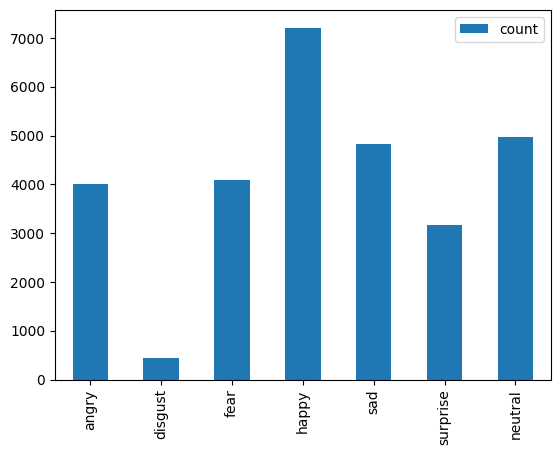

In [8]:
label_count.plot(kind='bar')

#1. 데이터셋 나누기

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split=0.2)

## 이미지 사이즈 설정
* 이미지의 사이즈가 불규칙하면 학습을 할 수 없기 때문에 리사이즈할 크기를 지정합니다.

In [10]:
width = 48
height = 48

## 학습 세트

In [11]:
trainDatagen = datagen.flow_from_directory(directory = train_dir,
                                           target_size = (height, width),
                                           class_mode = 'categorical',
                                           batch_size = 64,
                                           subset='training')

Found 22976 images belonging to 7 classes.


## 검증 세트

In [12]:
valDatagen = datagen.flow_from_directory(directory = train_dir,
                                         target_size =(height, width),
                                         class_mode = 'categorical',
                                         batch_size = 64,
                                         subset='validation')

Found 5743 images belonging to 7 classes.


# 2. VGG16

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg = VGG16(weights="imagenet", include_top=False, input_shape=(height, width, 3))

model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(7,activation="softmax"))

58889256/58889256 [==============================] - 0s 0us/step


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 7)                 3591      
                                                                 
Total params: 14,718,279
Trainable params: 14,718,279
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [18]:
history = model.fit(trainDatagen,
                    steps_per_epoch = len(trainDatagen),
                    epochs = 3,
                    validation_data = valDatagen,
                    validation_steps=len(valDatagen),
                    callbacks=[early_stop])

Epoch 1/3
359/359 [==============================] - 7312s 20s/step - loss: 2.6221 - accuracy: 0.2436 - val_loss: 1.8093 - val_accuracy: 0.2565
Epoch 2/3
359/359 [==============================] - 48s 134ms/step - loss: 1.7906 - accuracy: 0.2579 - val_loss: 1.7825 - val_accuracy: 0.2389
Epoch 3/3
359/359 [==============================] - 45s 126ms/step - loss: 1.7046 - accuracy: 0.3026 - val_loss: 1.6881 - val_accuracy: 0.3094


In [19]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,2.622091,0.243602,1.809267,0.256486
1,1.790556,0.257878,1.782501,0.238900
2,1.704572,0.302620,1.688145,0.309420


<Axes: >

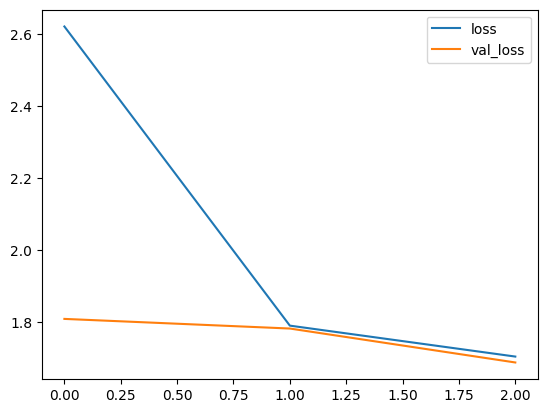

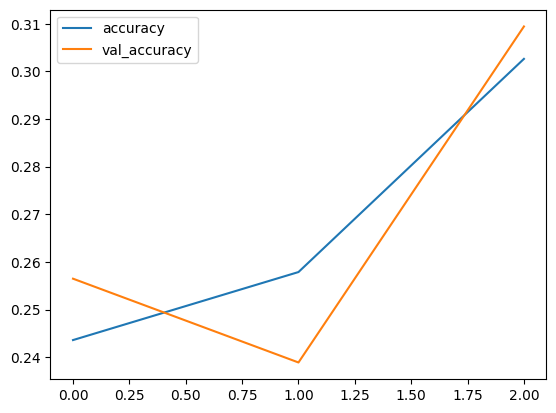

In [20]:
# history
df_hist[['loss','val_loss']].plot()
df_hist[['accuracy','val_accuracy']].plot()

학습 너무 오래걸려서 관뒀다 죄송합니다